<a href="https://colab.research.google.com/github/reshmanjali/data-visualization/blob/main/DV_Term_proj_Initial_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**



**Visualizing The House Price Influencing Factors**

# **Team**

Bhavya Busireddy

Sai Reshmanjali Guntupalli

# **Project Description**


**Project Goal:**

The main aim of this project is to understand how house prices in Iowa are influenced by various other parameters.
Some of the factors are below.

**Data Description:**

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape:General shape of the property

LandContour: Flatness of the property

landscape: Slope of property

Neighborhood: Physical locations within city limits

OverallCond: Overall condition rating

YearBuilt: Original construction date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering the house

Heating: Type of heating

CentralAir: Central air conditioning

Electrical: Electrical system

There are about 80 such parameters.

**Project Description**

We will see how some of these parameters cause an effect on the house sale price. We will also apply a couple of ML models snd compare their performance.


# **Library Installations**

In [25]:
pip install dash

In [26]:
pip install jupyter-dash

# **Importing Common libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyter_dash import JupyterDash
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

# **Data Loading**

In [29]:
df = pd.read_csv("train-term-data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Understanding the data**

In [30]:
df.shape

(1460, 81)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0




---



---



# **Visiualizing the data**

**Interactive plots**

No. of houses sold over the years is visualized.

Hovering on the bar plot below, we can see the number of houses sold over the year sold.

In [33]:
dff_dataa = df[['YrSold']]
dff_dataa = dff_dataa.groupby(['YrSold'])['YrSold'].count().reset_index(name='Houses_Sold')
#dff_dataa = dff_dataa.groupby('YrSold','Id').count().reset_index()
print(dff_dataa)
display = px.bar(dff_dataa, x="YrSold", y="Houses_Sold",title="No. of houses sold in the given year")
display.show()

   YrSold  Houses_Sold
0    2006          314
1    2007          329
2    2008          304
3    2009          338
4    2010          175


We have two types of year variables, year built, and year remodeled, which we believe will strongly influence the sale price of the houses, so we have plotted the average price concerning year built and year remodeled in the below two plots.


In the below figure, we have an interactive graph that gives us the average saleprice over the year built when hovered upon it.

In [34]:
df_data = df[['SalePrice','YearBuilt']]
df_data = df_data.groupby('YearBuilt')['SalePrice'].mean().reset_index(name='Average_SalePrice')
print(df_data)
chart = px.line(df_data, x="YearBuilt", y="Average_SalePrice",title="Average Sale Price over the year Built")
chart.update_traces(line_color='#ff0000')
chart.show()

     YearBuilt  Average_SalePrice
0         1872      122000.000000
1         1875       94000.000000
2         1880      200619.750000
3         1882      168000.000000
4         1885      111250.000000
..         ...                ...
107       2006      251775.447761
108       2007      255362.734694
109       2008      348849.130435
110       2009      269220.000000
111       2010      394432.000000

[112 rows x 2 columns]


In the below graph we can observe how the remodelling year effects the overall saleprice.

It is an interactive graph, hovering on which you can see the average saleprice and the year remodelled

In [35]:
dff_data = df[['SalePrice','YearRemodAdd']]
dff_data = dff_data.groupby('YearRemodAdd')['SalePrice'].mean().reset_index(name='Average_SalePrice')
print(dff_data)
chart = px.line(dff_data, x="YearRemodAdd", y="Average_SalePrice",title="Average Sale Price over the year Remodeled")
chart.show()

    YearRemodAdd  Average_SalePrice
0           1950      117463.056180
1           1951      129975.000000
2           1952      110398.600000
3           1953      147640.000000
4           1954      121142.857143
..           ...                ...
56          2006      229471.134021
57          2007      224807.250000
58          2008      269709.100000
59          2009      284085.391304
60          2010      336963.500000

[61 rows x 2 columns]


# **Interactive Dashboards**

In the below cell we have created an interactive dashboard to visualize how the selling prices of the houses are changing over the years based on the overall quality and overall condition of the houses. We have a slider to select the particular range of years, where years represent the year built of the houses. When we hover over the scatter plot we can see the average selling price and lot area of the houses along with overall quality and condition index.

For a house to be sold, the selling price will be highly influenced by how old it is and the quality and condition of the house. Here we visualize the overall condition and quality of the homes built over the years and the average price based on the overall condition / overall quality; the lot area is plotted for better understanding.

In [36]:
dff = df [['OverallQual','OverallCond','LotArea','SalePrice','YearBuilt']]
dff1 = dff.groupby(['OverallQual','LotArea','YearBuilt'])['SalePrice'].mean().reset_index(name='Average_SalePrice')
dff2 = dff.groupby(['OverallCond','LotArea','YearBuilt'])['SalePrice'].mean().reset_index(name='Average_SalePrice')
print(dff1)
print(dff2)
#fig = px.scatter(dff, x="YearBuilt", y="OverallQual", y= "OverallCond")
#fig.show()

      OverallQual  LotArea  YearBuilt  Average_SalePrice
0               1     5000       1946            39300.0
1               1    10020       1922            61000.0
2               2     6120       1936            60000.0
3               2     8400       1920            60000.0
4               2     9000       1949            35311.0
...           ...      ...        ...                ...
1400           10    21535       1994           755000.0
1401           10    22950       1892           475000.0
1402           10    35760       1995           625000.0
1403           10    40094       2007           184750.0
1404           10    63887       2008           160000.0

[1405 rows x 4 columns]
      OverallCond  LotArea  YearBuilt  Average_SalePrice
0               1    10020       1922            61000.0
1               2     5350       1940            76500.0
2               2     8470       1915            85000.0
3               2     8967       1920            67000.0
4     

In [37]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
    dcc.Graph(id='cham_hist'),
    dcc.Graph(id='run_hist'),
    html.Label('Year Range-Slider'),
    dcc.RangeSlider(
        id = 'year-range',
        min = dff['YearBuilt'].min(),
        max = dff['YearBuilt'].max(),
        value = [dff['YearBuilt'].min(),dff['YearBuilt'].max()],
         marks = {str(i):str(i) for i in range(dff['YearBuilt'].min(),dff['YearBuilt'].max(),10)},
        step = None     
    )

])


@app.callback(
    Output('cham_hist', 'figure'), Input('year-range', 'value'))
def update_cham(val_yr):
    dff_updated = dff1[(dff1['YearBuilt']>=val_yr[0])&(dff1['YearBuilt']<=val_yr[1])]
    chart1 = px.scatter(dff_updated, x='YearBuilt',y="OverallQual", title ="Quality of Houses over the years",
                        hover_name="YearBuilt", hover_data=["Average_SalePrice", "OverallQual", "LotArea"]) 
    #chart1.update_layout(xaxis_type = "category")
    return chart1
@app.callback(
    Output('run_hist', 'figure'), Input('year-range', 'value'))
def update_cham(val_yr):
    
    dff_update = dff2[(dff2['YearBuilt']>=val_yr[0])&(dff2['YearBuilt']<=val_yr[1])] 
    chart2 = px.scatter(dff_update, x='YearBuilt',y="OverallCond", title = "Condition of Houses over the Years",  
                        hover_name="YearBuilt", hover_data=["Average_SalePrice", "OverallCond", "LotArea"]) 
    chart2.update_layout(xaxis_type = "category")
    return chart2


if __name__ == '__main__':
    app.run_server(mode='inline')

<IPython.core.display.Javascript object>

For each year how many number of houses we have in the given dataset. It will also helps us in understanding how fast the number of houses are growing over the years.

In the below figure we have plotted the year built and the toltal number of houses built in that particular year.

In [39]:
dff_data1 = df[['YearBuilt']]
dff_data1 = dff_data1.groupby(['YearBuilt'])['YearBuilt'].count().reset_index(name='Houses_Built')
#dff_dataa = dff_dataa.groupby('YrSold','Id').count().reset_index()
print(dff_data1)
#display = px.bar(dff_data1, x="YearBuilt", y="Houses_Sold",title="No of houses Built in the given year")
#display.show()

     YearBuilt  Houses_Built
0         1872             1
1         1875             1
2         1880             4
3         1882             1
4         1885             2
..         ...           ...
107       2006            67
108       2007            49
109       2008            23
110       2009            18
111       2010             1

[112 rows x 2 columns]


In [40]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div([
    dcc.Graph(id='cham_hist'),

    html.Label('Year Range-Slider'),
    dcc.RangeSlider(
        id = 'year-range',
        min = dff_data1['YearBuilt'].min(),
        max = dff_data1['YearBuilt'].max(),
        value = [dff_data1['YearBuilt'].min(),dff_data1['YearBuilt'].max()],
         marks = {str(i):str(i) for i in range(dff_data1['YearBuilt'].min(),dff_data1['YearBuilt'].max(),10)},
        step = None     
    ),

])
@app.callback(
    Output('cham_hist', 'figure'), Input('year-range', 'value'))
def update_cham(val_yr):
    dff_data1_updated = dff_data1[(dff_data1['YearBuilt']>=val_yr[0])&(dff_data1['YearBuilt']<=val_yr[1])]
    chart1 = px.histogram(dff_data1_updated, x='YearBuilt',y="Houses_Built", title='Number of Houses built in a given year') 
    chart1.update_layout(xaxis_type = "category")
    return chart1

if __name__ == '__main__':
    app.run_server(mode='inline')
    


<IPython.core.display.Javascript object>

Sale price is highly influenced by LoteArea, LotShape. So we have a scatter plot plotted that helps to visualize these two variable at a time. We have year slider which represents YearBuilt, that helps us to filter the data with respect to year and when hovered we can see the LotArea, LotShape and the sale price of the houses in that particular year range.

In [41]:
ff = df[["LotArea","LotShape","YearBuilt","SalePrice","GarageArea"]]
print(ff)


      LotArea LotShape  YearBuilt  SalePrice  GarageArea
0        8450      Reg       2003     208500         548
1        9600      Reg       1976     181500         460
2       11250      IR1       2001     223500         608
3        9550      IR1       1915     140000         642
4       14260      IR1       2000     250000         836
...       ...      ...        ...        ...         ...
1455     7917      Reg       1999     175000         460
1456    13175      Reg       1978     210000         500
1457     9042      Reg       1941     266500         252
1458     9717      Reg       1950     142125         240
1459     9937      Reg       1965     147500         276

[1460 rows x 5 columns]


In [42]:

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    html.Label('Year Range-Slider'),
    dcc.RangeSlider(
       id = 'year-slider',
        min = ff['YearBuilt'].min(),
        max = ff['YearBuilt'].max(),
        value = [ff['YearBuilt'].min(),ff['YearBuilt'].max()],
         marks = {str(year):str(year) for year in range(ff['YearBuilt'].min(),ff['YearBuilt'].max(),10)},
        step = None     
    ),
])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(val_yr):
  
    filtered_df = ff[(ff['YearBuilt']>=val_yr[0])&(ff['YearBuilt']<=val_yr[1])]
    print(filtered_df)
    fig = px.scatter(filtered_df, x="LotArea", y="SalePrice",
                     size="LotArea", color="LotShape",
                      log_x=True, size_max=55)

    fig.update_layout(transition_duration=500)

    return fig


if __name__ == '__main__':
    app.run_server(mode="inline")

<IPython.core.display.Javascript object>

# **Finding the correlation between numerical values of the dataset**

***Correlation:***

It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. 
Correlation is the statistical summary of the relationship between variables.

***HeatMap:***

A heat map is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. Many different color schemes can be used to illustrate the heat map


In the below figure you can see the correlation in the form of a heat map for our housing dataset. Here, we only see 38 features because only those are the columns with numerical values.


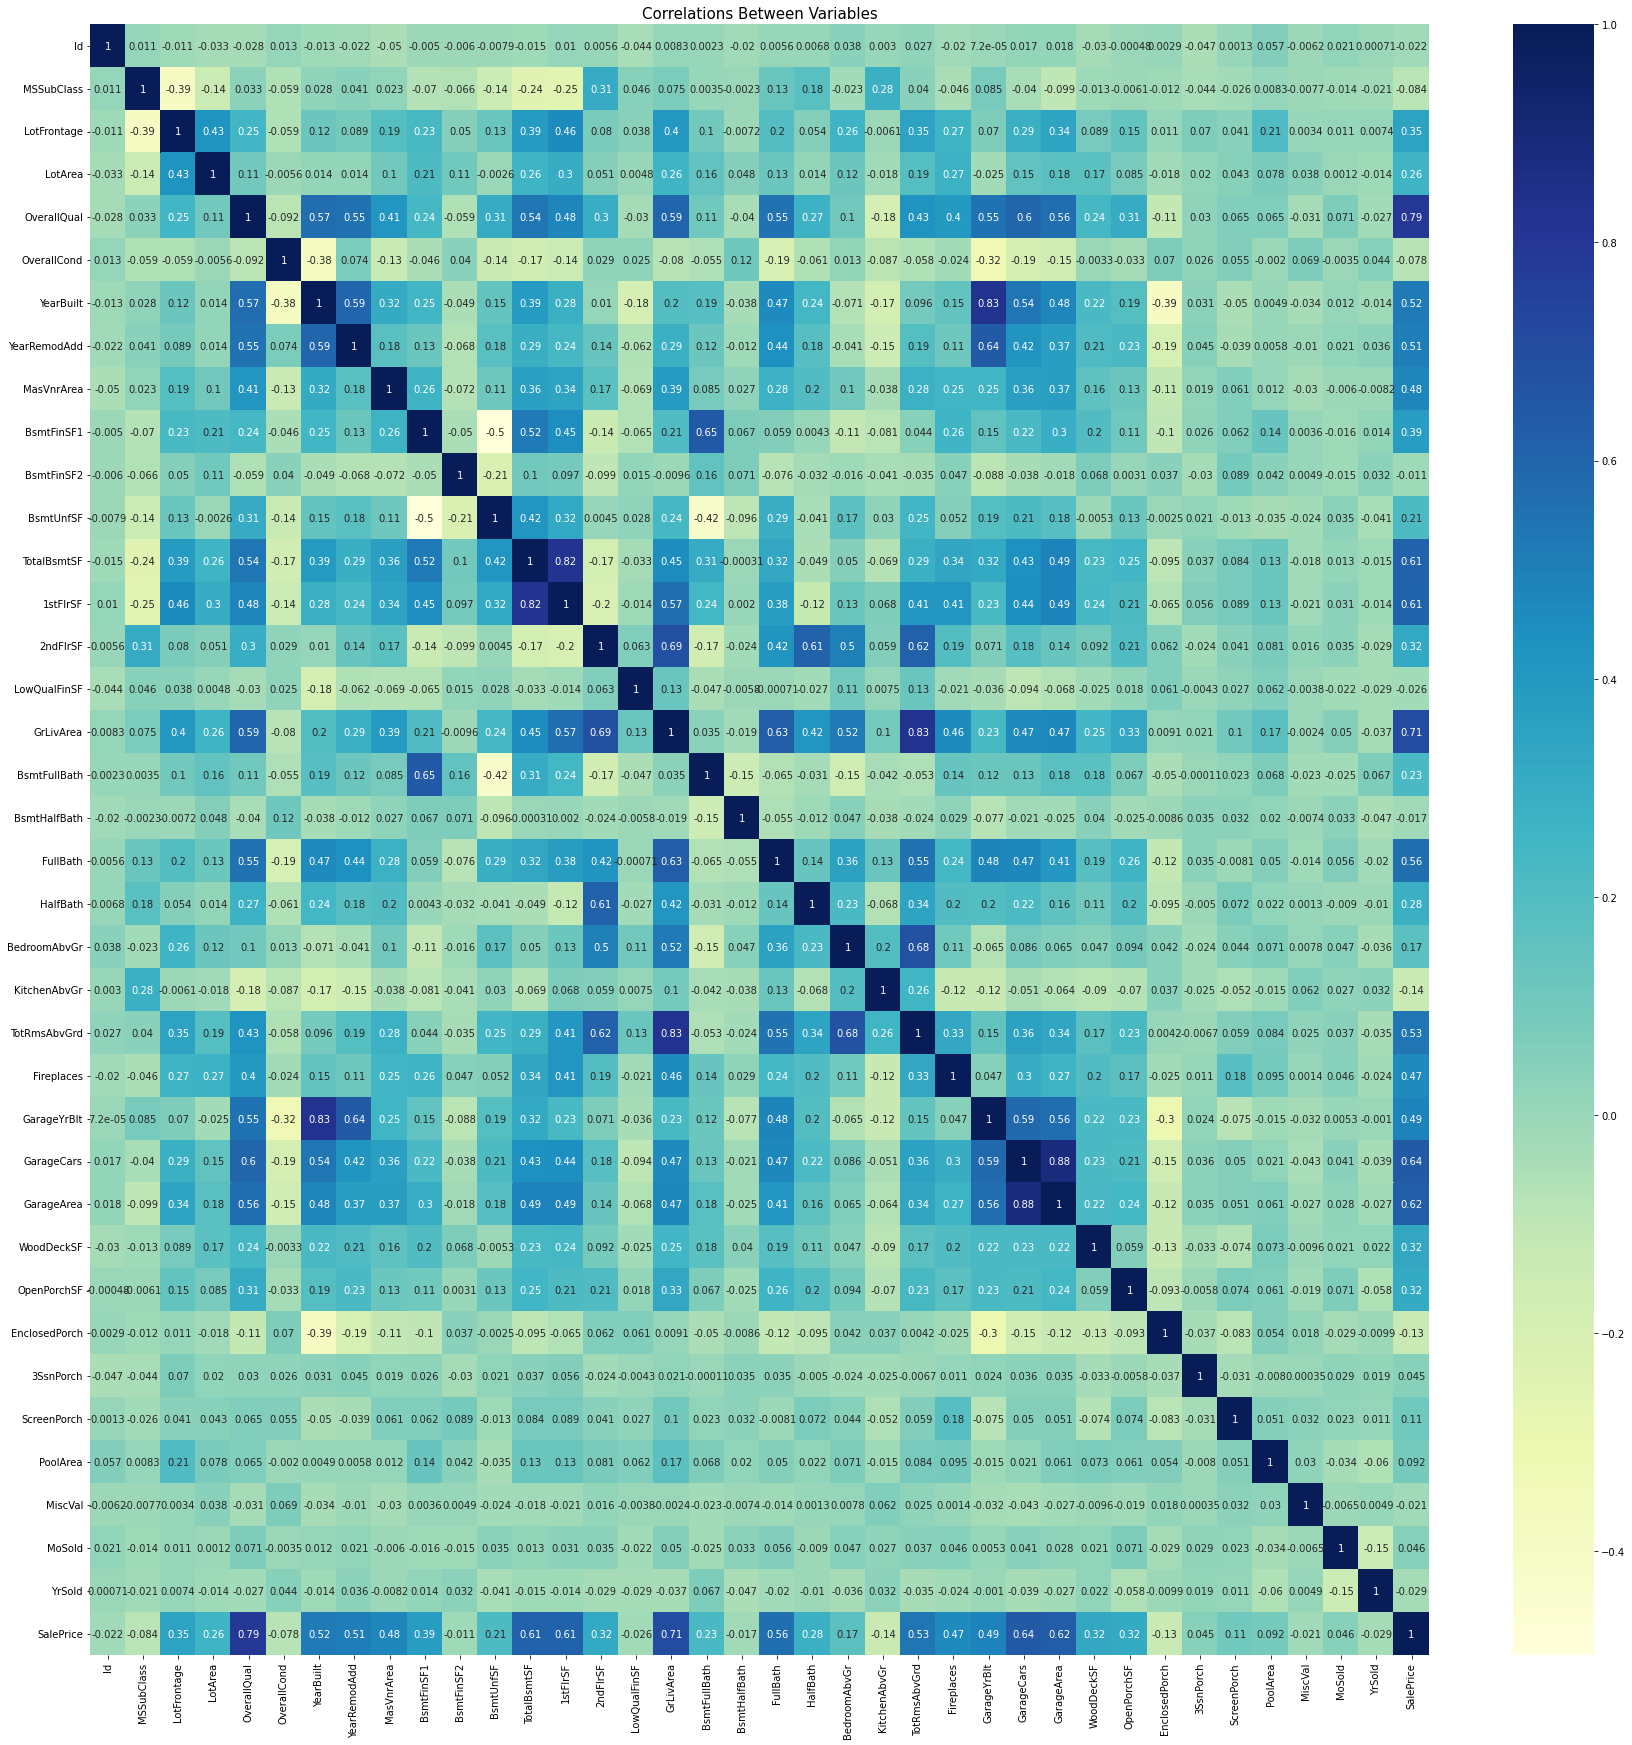

In [43]:
plt.figure(figsize=(30,30))
#sns.heatmap(df.corr(), annot= True)
sns.heatmap(df.corr(), cmap="YlGnBu", annot= True)
plt.title("Correlations Between Variables", size=15)
plt.show()

# **Understanding the distribution of each feature**

***Histograms*** 

Histograms are very useful in statistical analysis. Histograms are generally used to represent the frequency distribution for a numeric array.

In order to plot a histogram using pandas, chain the .hist() function to the dataframe. This will return the histogram for each numeric column in the pandas dataframe.

In our hosuing dataset there are 38 columns that are numeric, so we get a total of 38 histograms representing each colum/feature in the dataset 

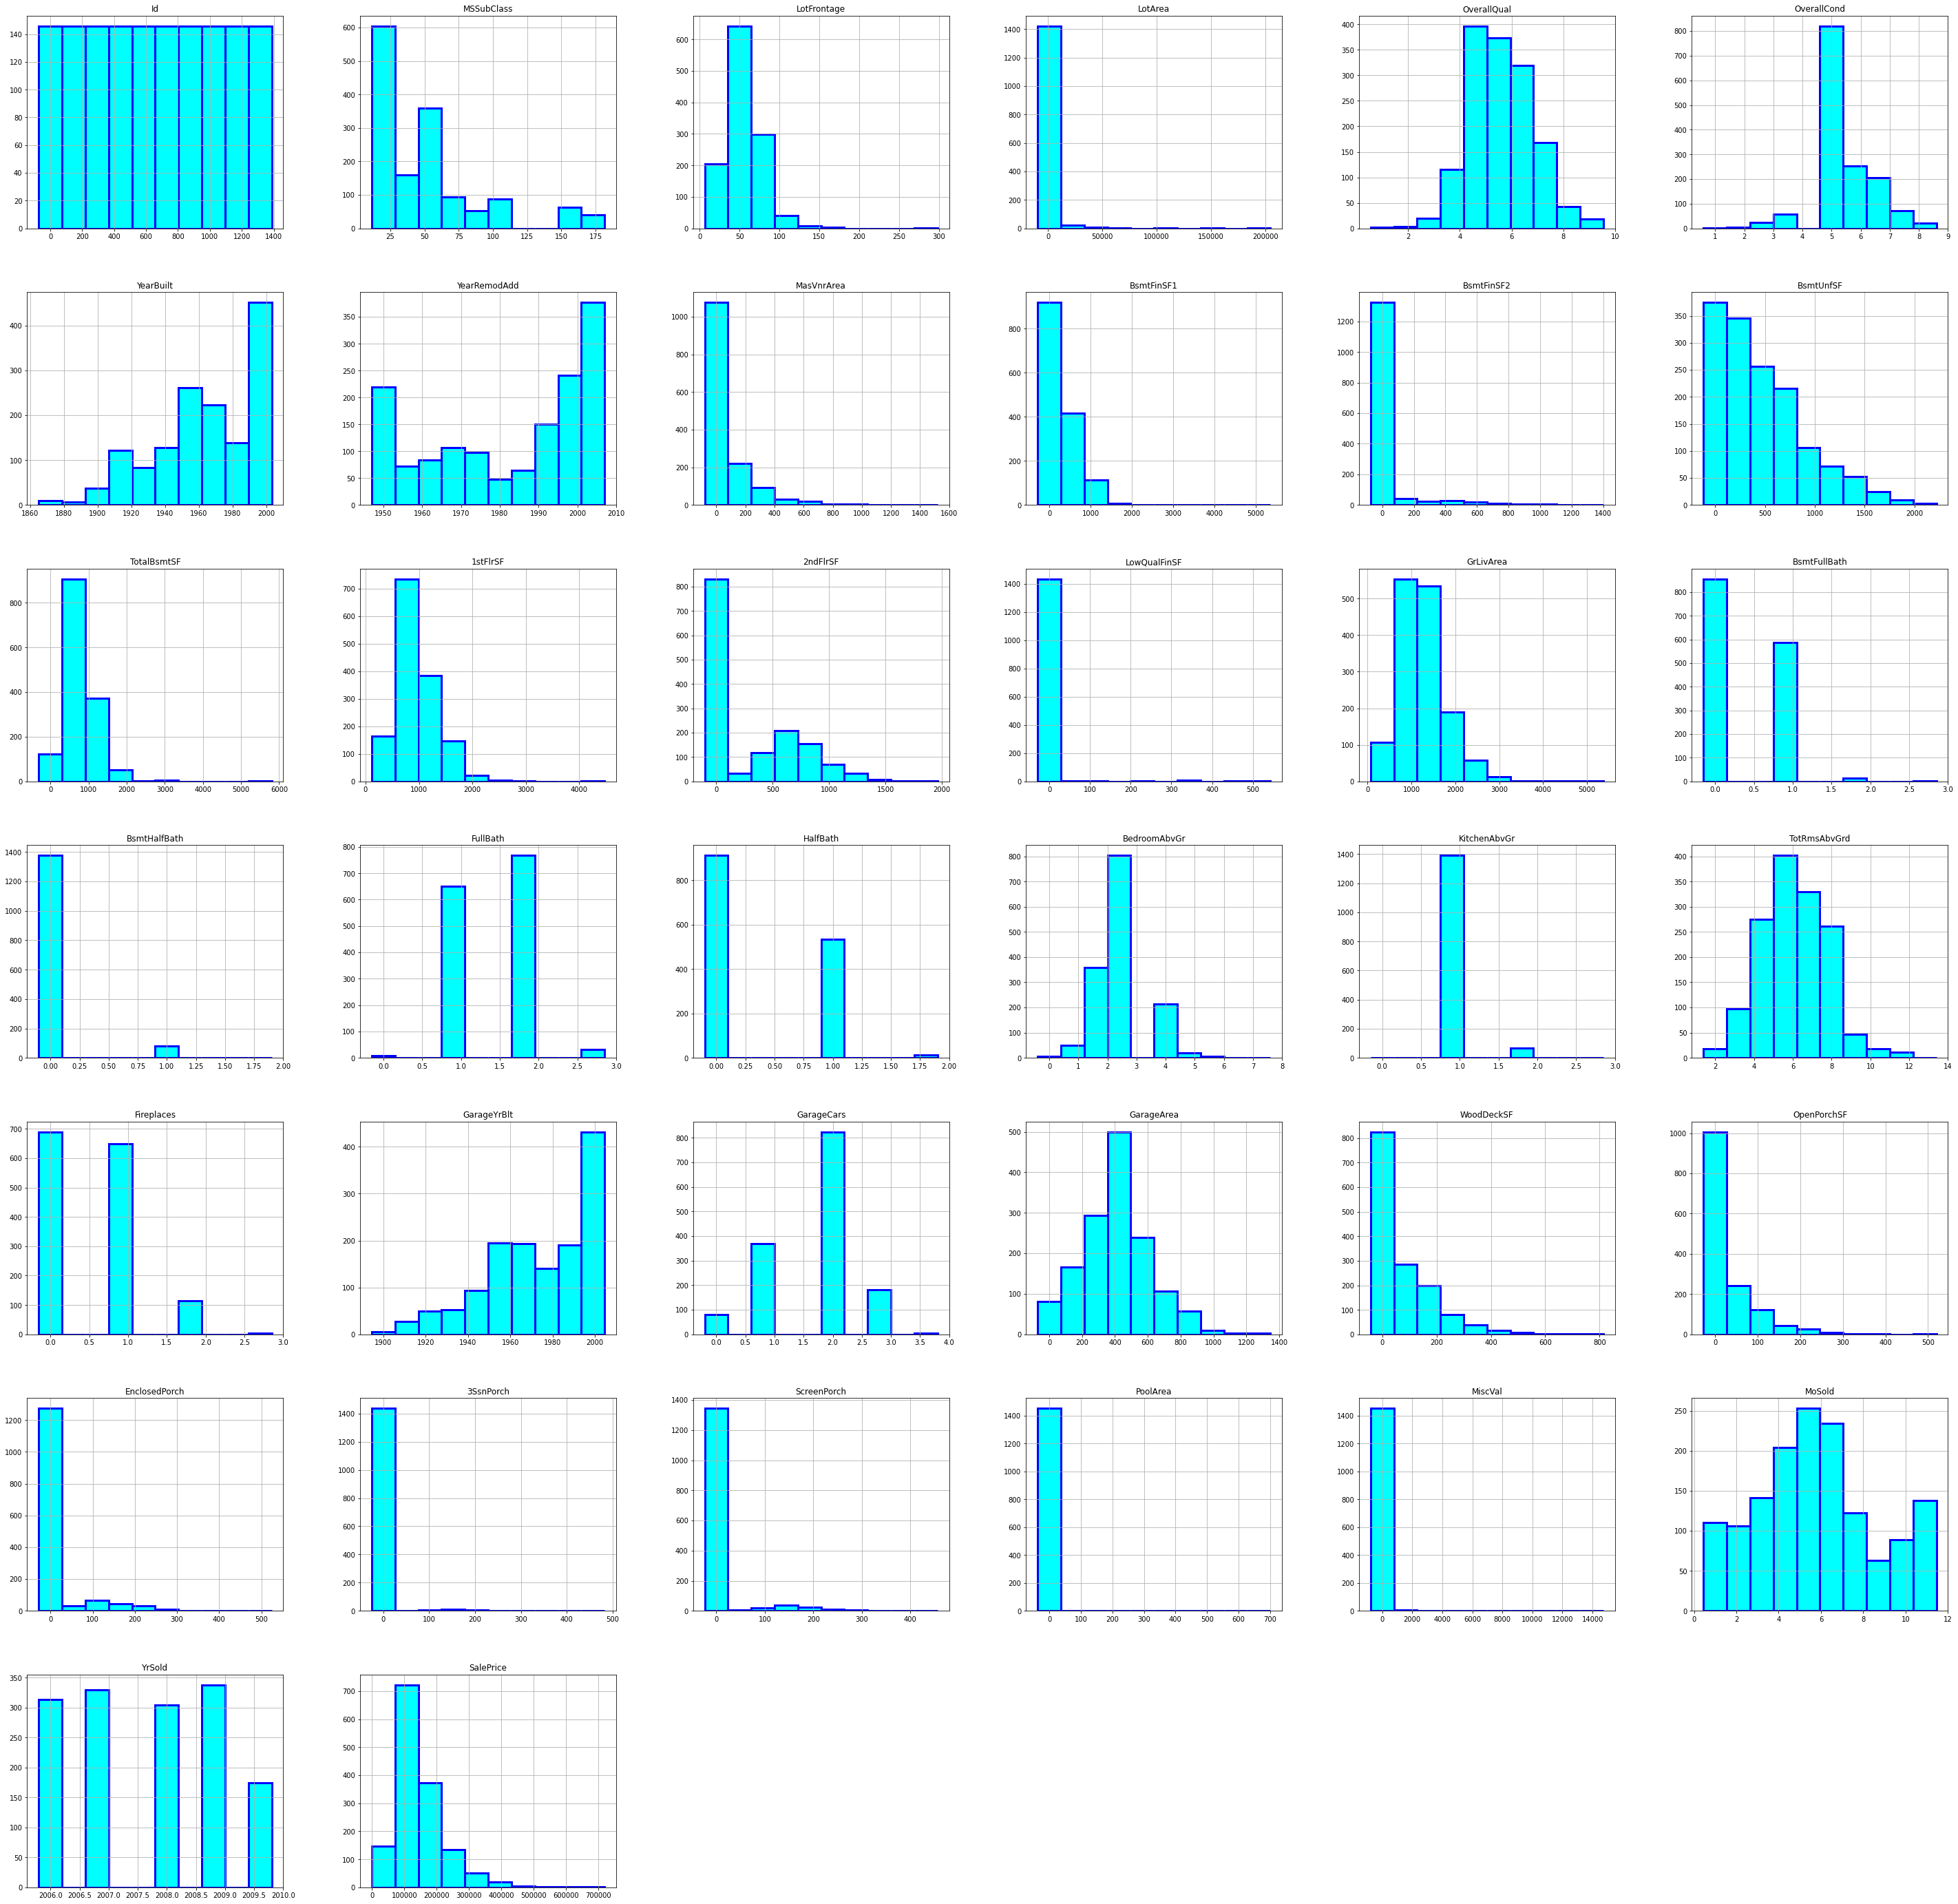

In [44]:
# histograms
df.hist(align='left', color='cyan', edgecolor='blue',
              linewidth=3,figsize=(50,50));


**Feature Selection**

We are selecting numerical features which have more than 0.50 or less than -0.50 correlation rate based on Pearson Correlation Method—which is the default value of parameter "method" in corr() function. As for selecting categorical features, we just selected the categorical values which we believe have significant effect on the target variable such as Heating and MSZoning.

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996    

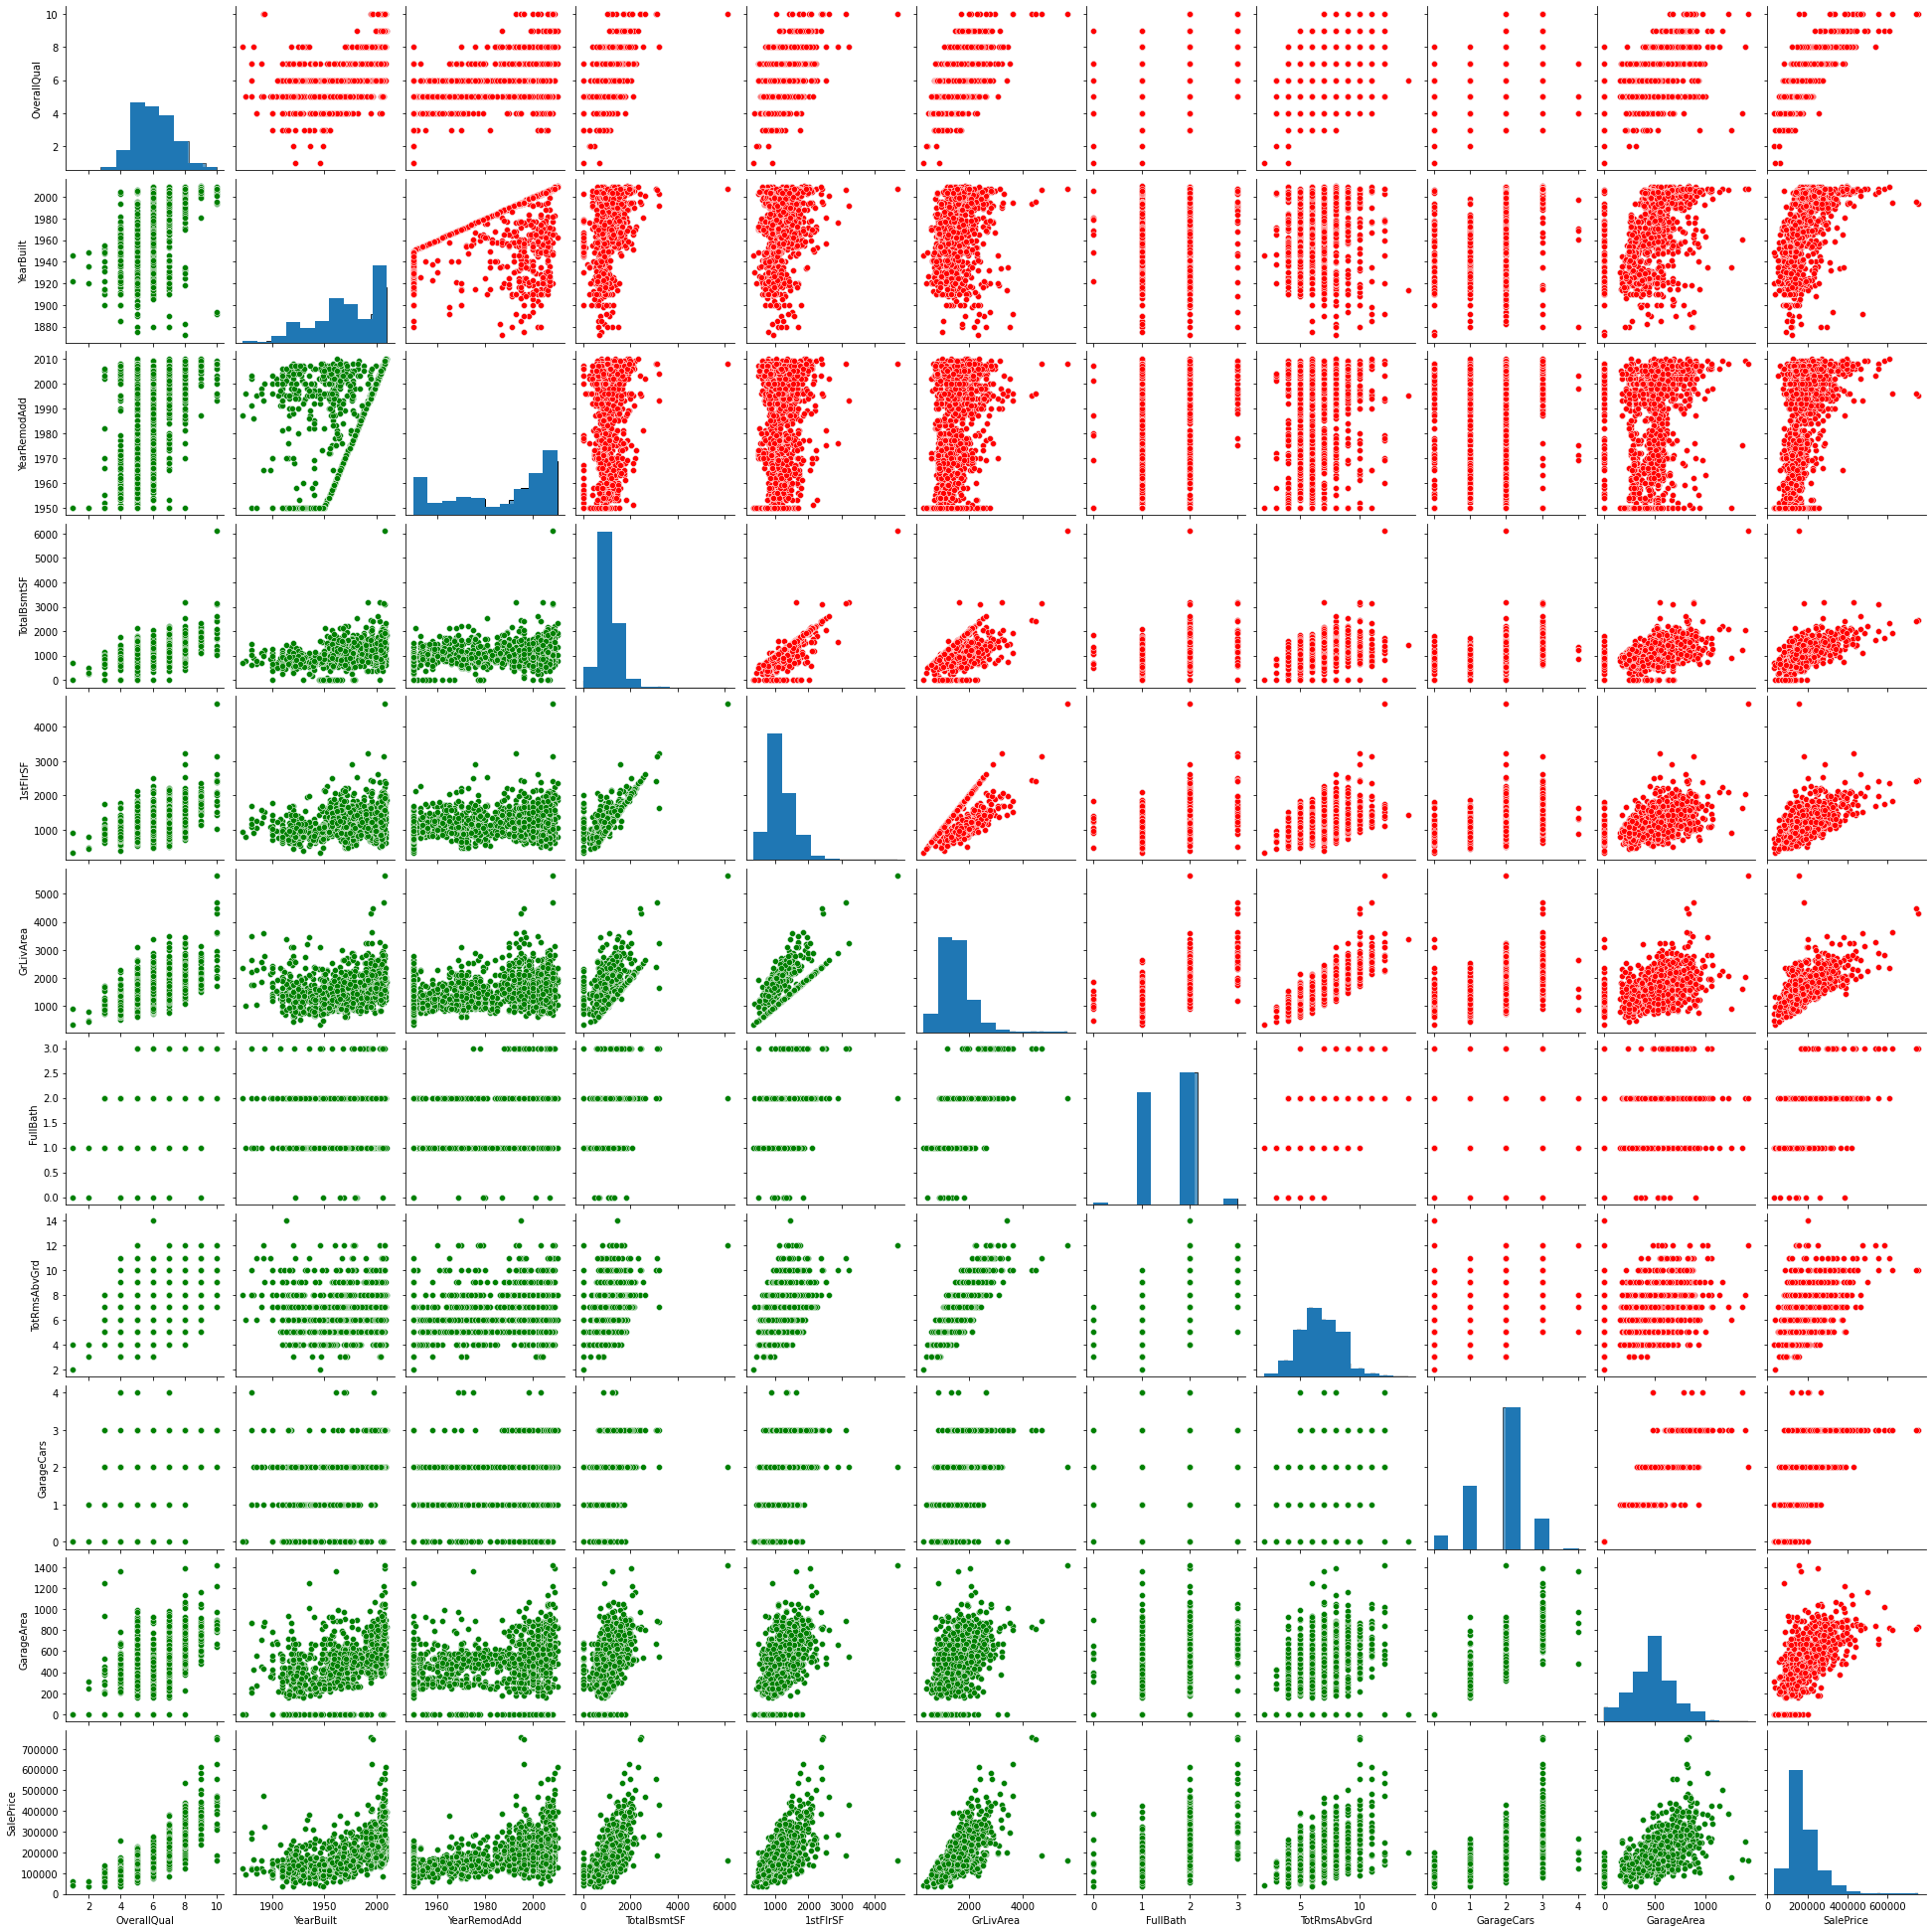

In [45]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
print(important_num_cols)
cat_cols = ["RoofStyle","MSZoning", "Utilities","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]
print(df)
g = sns.pairplot(df[important_num_cols])
g.map_upper(sns.scatterplot,color='red')
g.map_lower(sns.scatterplot, color='green')
g.map_diag(plt.hist)

Box plots visually show the distribution of numerical data and skewness through displaying the data quartiles (or percentiles) and averages.

Box plots show the five-number summary of a set of data: including the minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score.

A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data.

OverallQual        AxesSubplot(0.125,0.816017;0.133621x0.0639831)
YearBuilt       AxesSubplot(0.285345,0.816017;0.133621x0.0639831)
YearRemodAdd     AxesSubplot(0.44569,0.816017;0.133621x0.0639831)
TotalBsmtSF     AxesSubplot(0.606034,0.816017;0.133621x0.0639831)
1stFlrSF        AxesSubplot(0.766379,0.816017;0.133621x0.0639831)
GrLivArea          AxesSubplot(0.125,0.739237;0.133621x0.0639831)
FullBath        AxesSubplot(0.285345,0.739237;0.133621x0.0639831)
TotRmsAbvGrd     AxesSubplot(0.44569,0.739237;0.133621x0.0639831)
GarageCars      AxesSubplot(0.606034,0.739237;0.133621x0.0639831)
GarageArea      AxesSubplot(0.766379,0.739237;0.133621x0.0639831)
SalePrice          AxesSubplot(0.125,0.662458;0.133621x0.0639831)
dtype: object

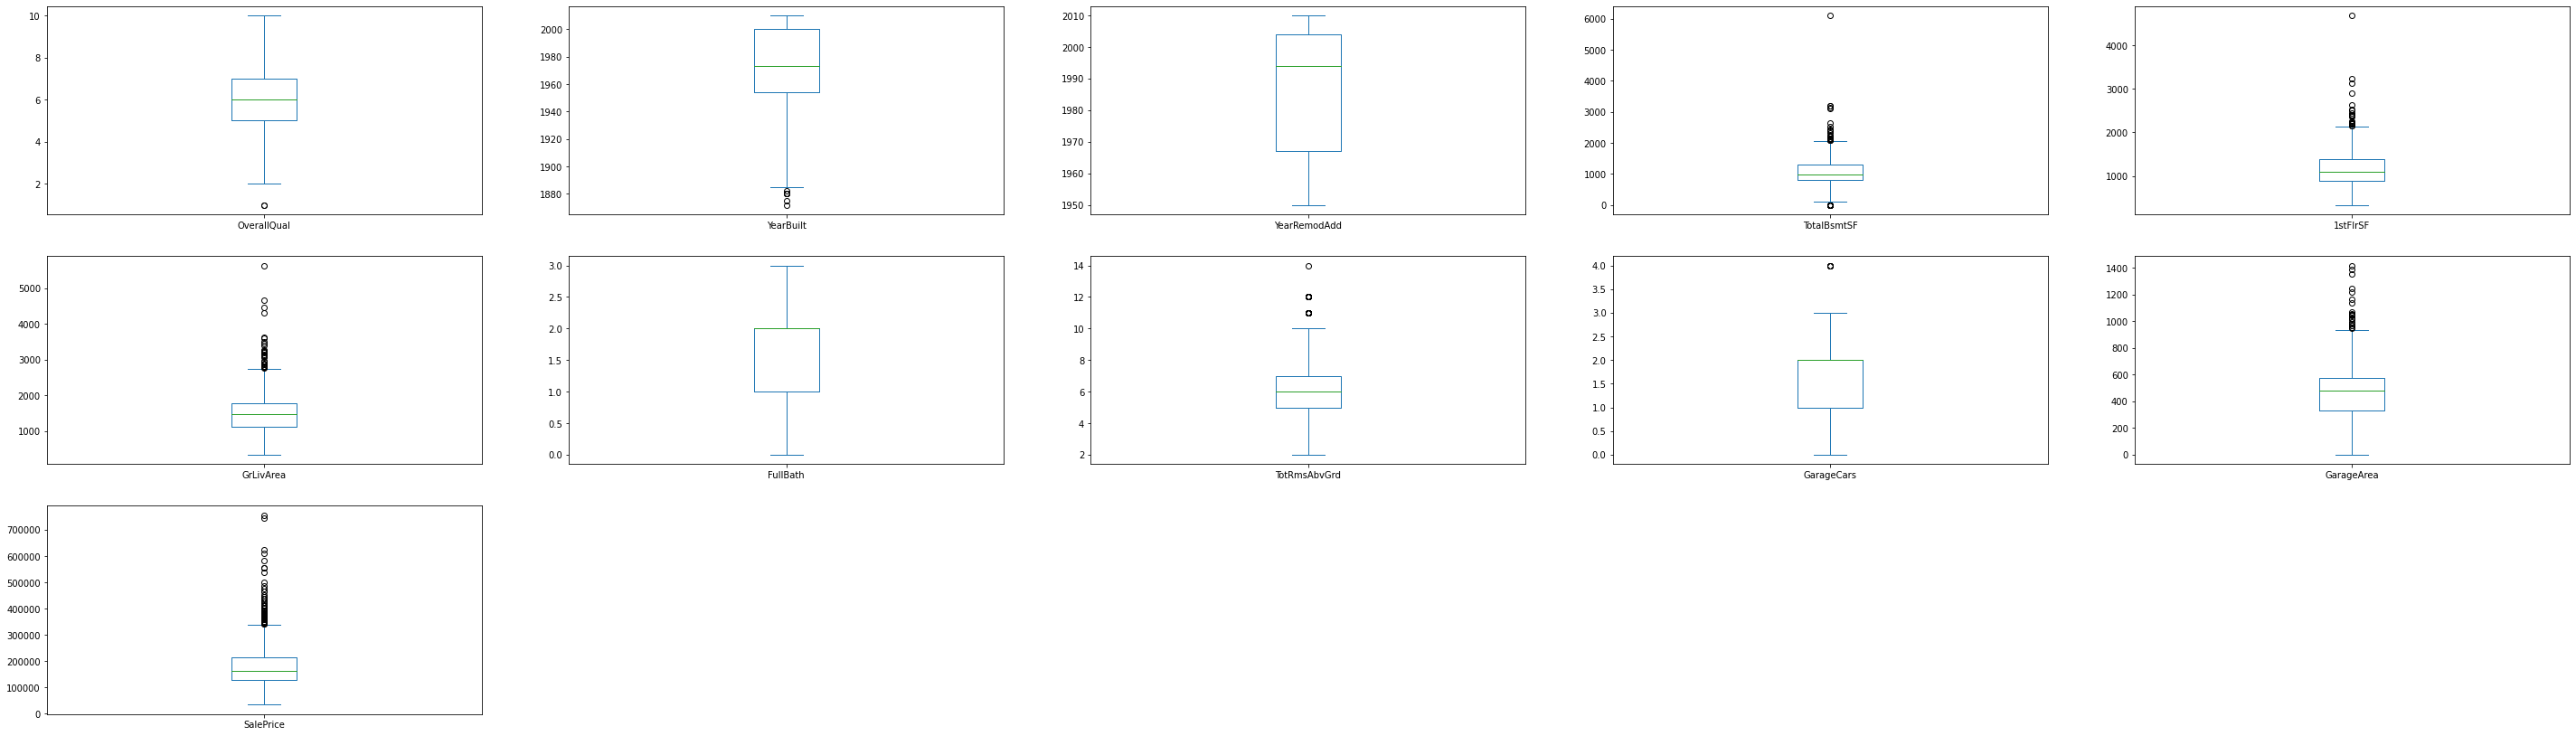

In [46]:
df.plot(kind= 'box', subplots = True, layout = (10,5), fontsize = 10, figsize = (50, 50))

***KDE Plot***

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Compared to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
      OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078    

<Figure size 720x576 with 0 Axes>

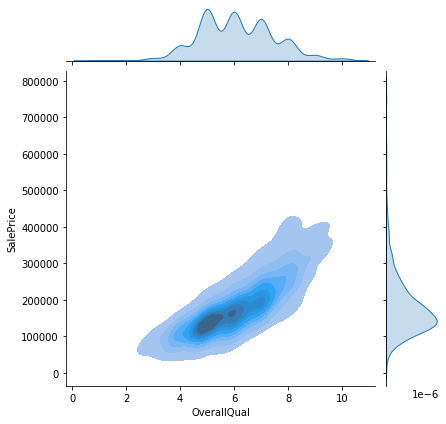

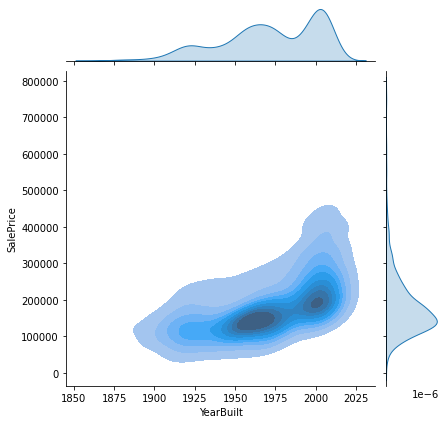

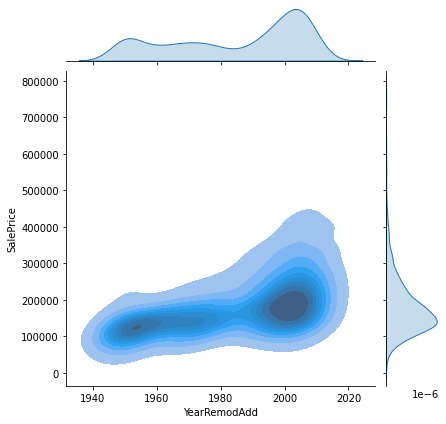

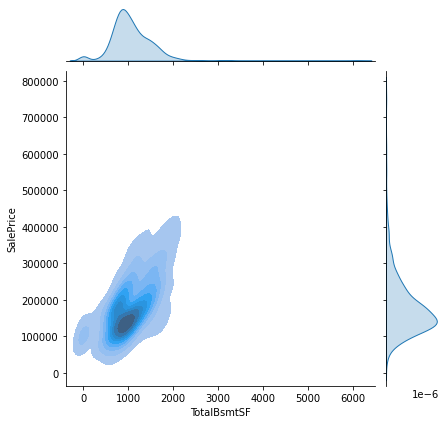

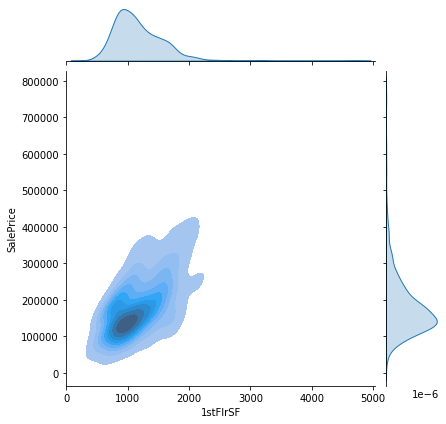

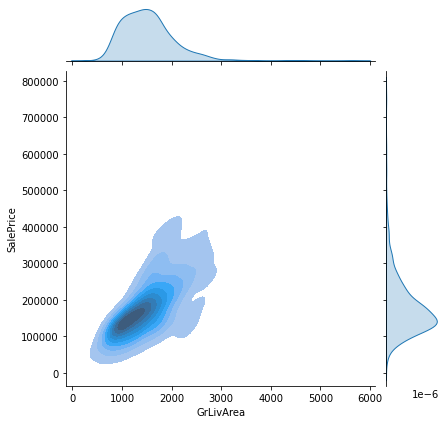

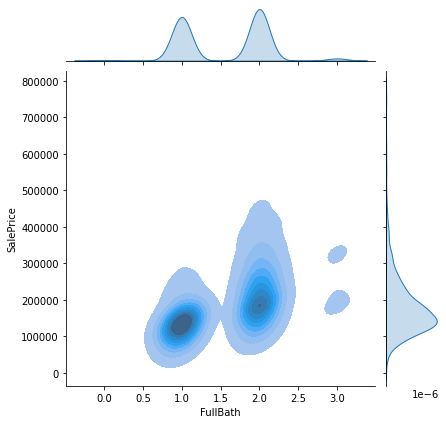

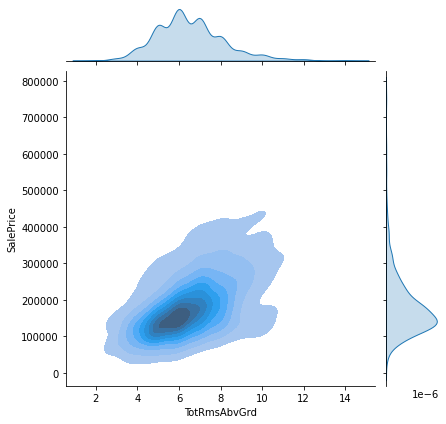

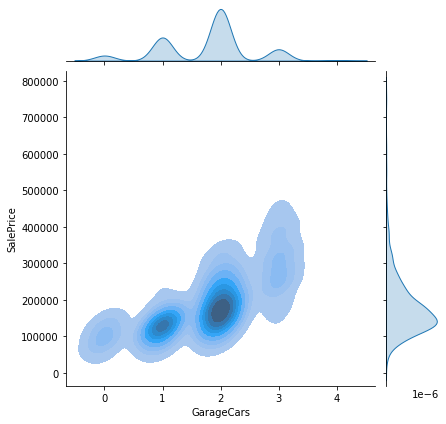

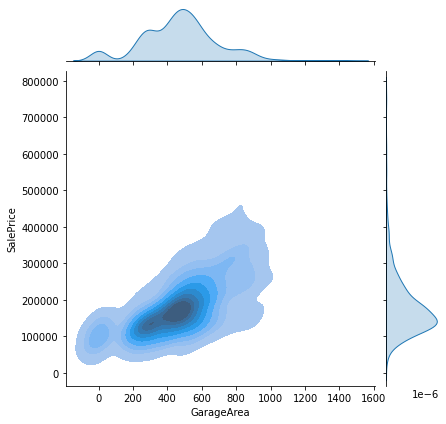

In [47]:
plt.figure(figsize=(10,8))
x_df = important_num_cols[:-1]
print(x_df)
print(df)
for i in x_df:
  sns.jointplot(x=df[i], y=df["SalePrice"], kind="kde",shade=True,fill=True, layout = (10,5))
plt.show()

# **Interactive Dashboard with Important Features**

Now that we have the important features that have high influence on the sale price of the houses, we thought it would be useful if we have a single dashboard that shows each of these parameters influence on the saleprice.

So, we have created a dashboard with a dropdown where we can select any important feature and observe its influence on the sale price of the house with the help of a scatterplot.
It would also help to have the same comparision from a boxplot perspective as well. So, we added a box plot for the same.




In other words,

In the below dashboard you can select any important feature from a dropdown. It would be used as X-axis for the plot. The y-axis will always be our target  column i.e., salePrice. 
You can then observe these in the form of scatter plot and a box plot

In [48]:

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)


available_indicators = important_num_cols

app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                id='xaxis-column',
                options=[{'label': i, 'value': i} for i in available_indicators],
                value= available_indicators[0]
            )
        ],
        style={'width': '48%', 'display': 'inline-block'}),
    ]),

    dcc.Graph(id='indicator-graphic'),
    dcc.Graph(id='indicator-graphic2'),
])

@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'),
)
def update_graph(xaxis_column_name):

    fig = px.box(x=df[xaxis_column_name],
                     y = df['SalePrice'],
                     )

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name)
    fig.update_yaxes(title="SalePrice")
    
    return fig



@app.callback(
    Output('indicator-graphic2', 'figure'),
    Input('xaxis-column', 'value'),
)
def update_graph(xaxis_column_name):
   
    fig = px.scatter(x=df[xaxis_column_name],
                     y = df['SalePrice'],
                     )

    fig.update_layout(margin={'l': 80, 'b': 80, 't': 10, 'r': 0}, hovermode='closest')

    fig.update_xaxes(title=xaxis_column_name)
    fig.update_yaxes(title="SalePrice")
    
    return fig


if __name__ == '__main__':
    app.run_server(mode="inline")

<IPython.core.display.Javascript object>

# **Clean the Datasets**

Having clean data will ultimately increase overall productivity and allow for the highest quality information in your decision-making

In [50]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df = df.reset_index()

# **Preparing the Data for the Modelling**

Splitting the dataset into input and output chunks

In our housing dataset, the output/target feature is "SalePrice" and all the other columns in the dataset are the input features.

Usually, the output feature is represented by 'y' and input features are on 'x'

In [51]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
print(X)
print(y)

      level_0  index  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0           0      0            7       2003          2003          856   
1           1      1            6       1976          1976         1262   
2           2      2            7       2001          2002          920   
3           3      3            7       1915          1970          756   
4           4      4            8       2000          2000         1145   
...       ...    ...          ...        ...           ...          ...   
1455     1455   1455            6       1999          2000          953   
1456     1456   1456            6       1978          1988         1542   
1457     1457   1457            7       1941          2006         1152   
1458     1458   1458            5       1950          1996         1078   
1459     1459   1459            5       1965          1965         1256   

      1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  \
0          856       1

**One-Hot Encoding**

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

The basic idea of one-hot encoding is to create new variables that take on values 0 and 1 to represent the original categorical values.

Using the Pandas get_dummies() returns a dataframe with the column passed in returned as dummy variables. 

We know that there are several features for each record that are non-numeric such asUtilities, Heating etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

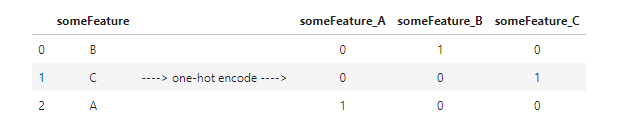


In [52]:
# print(X)
# print(cat_cols)
X=pd.get_dummies(X)
print(X)

      level_0  index  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  \
0           0      0            7       2003          2003          856   
1           1      1            6       1976          1976         1262   
2           2      2            7       2001          2002          920   
3           3      3            7       1915          1970          756   
4           4      4            8       2000          2000         1145   
...       ...    ...          ...        ...           ...          ...   
1455     1455   1455            6       1999          2000          953   
1456     1456   1456            6       1978          1988         1542   
1457     1457   1457            7       1941          2006         1152   
1458     1458   1458            5       1950          1996         1078   
1459     1459   1459            5       1965          1965         1256   

      1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  ...  KitchenQual_TA  \
0          856       1710

**Standardizing data**

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.
The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

Standardizing the numerical columns in X dataset. StandardScaler() adjusts the mean of the features as 0 and standard deviation of features as 1.

In [53]:
print(important_num_cols)
important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:
X.head()

,index,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,...,0,0,0,0,0,1,0,1,0,0
1,1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,...,1,0,0,0,0,1,0,1,0,0
2,2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,...,0,0,0,0,0,1,0,1,0,0
3,3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,...,0,1,0,0,0,0,0,1,0,0
4,4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,...,0,0,0,0,0,1,0,1,0,0


# **Shuffle and Split Data**

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. We will now split the data into training and test sets. 80% of the data will be used for training and 20% for testing.



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X_train)
print(y_train)

      index  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
254     254    -0.795151  -0.472560     -1.350194     0.585036  0.391697   
1066   1066    -0.071836   0.719786      0.442586    -0.589275 -0.940928   
638     638    -0.795151  -2.029235     -1.689368    -0.596115 -0.948691   
799     799    -0.795151  -1.134975     -1.689368    -0.744329 -0.469981   
380     380    -0.795151  -1.565545     -1.689368    -0.071666 -0.353538   
...     ...          ...        ...           ...          ...       ...   
1095   1095    -0.071836   1.150356      1.024029     0.585036  0.391697   
1130   1130    -1.518467  -1.433062     -1.689368     0.147235  0.427923   
1294   1294    -0.795151  -0.538802      0.248772    -0.441061 -0.772733   
860     860     0.651479  -1.764269      0.636400    -0.331610 -0.648527   
1126   1126     0.651479   1.183477      1.072482     0.719569  1.015313   

      GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  ...  KitchenQual_TA  \
254   -0.38

In [57]:
#Common Methods used for evaluation

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [59]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# **Models:**

We will apply the following learning models in this project which are currently available in scikit-learn.

(1) Linear Regression

(2) Random Forest Regression

(3) Support Vector Machines

**Linear Regression:**

Linear regression is commonly used for predictive analysis and modeling. For example, it can be used to quantify the relative impacts of the predictor variables the outcome variable.

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 23293.463620122126
MSE: 1408745615.2569304
RMSE: 37533.26012028439
R2 Score: 0.8163382394432025
------------------------------
RMSE Cross-Validation: 36444.770291232395


**Visualizing the model predictions and actual values**

In the below figure we are plotting the predicted values from the model(they are present in predictions variable) and the actual y values in a scatter plot. And we also have added a regression line. The line that represents perfect regression. The closer the points are to the line, the more accurate the model is.

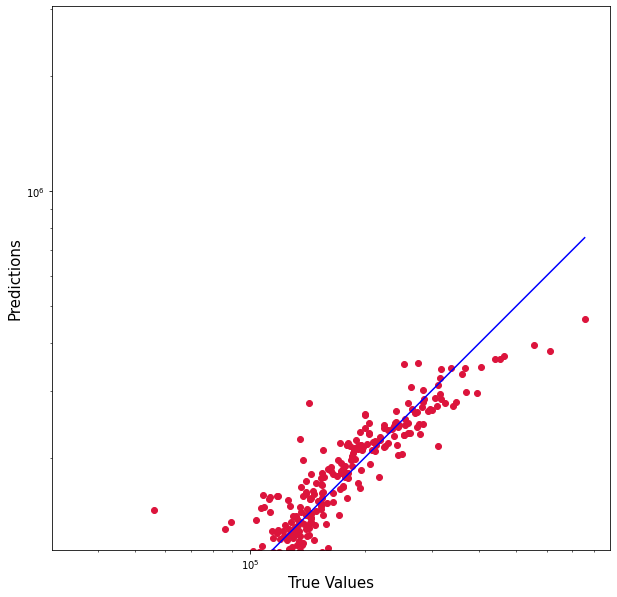

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)

plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Random forest regression **

Random Forests can also be used for regression tasks.

random decision forests is an ensemble learning method for classification, regression.

An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model. A model comprised of many models is called an ensemble model. 



In [62]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 18587.555273972604
MSE: 1053380600.3879144
RMSE: 32455.82536907534
R2 Score: 0.8626680832164748
------------------------------
RMSE Cross-Validation: 31853.945121148274


**Visualizing the model predictions and actual values**

In the below figure we are plotting the predicted values from the model(they are present in predictions variable) and the actual y values in a scatter plot. And we also have added a regression line. The line that represents perfect regression. The closer the points are to the line, the more accurate the model is.

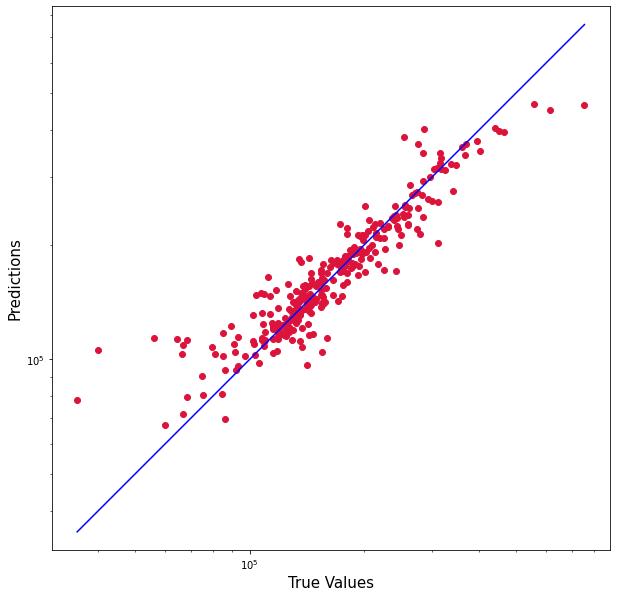

In [63]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

**Support Vector Machine**

SVMs are Supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. 
SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [64]:
svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 59086.22909188272
MSE: 7787157824.075239
RMSE: 88244.87420850708
R2 Score: -0.015231636012904115
------------------------------
RMSE Cross-Validation: 81221.59342070104


**Visualizing the model predictions and actual values**

In the below figure we are plotting the predicted values from the model(they are present in predictions variable) and the actual y values in a scatter plot. And we also have added a regression line. The line that represents perfect regression. The closer the points are to the line, the more accurate the model is.

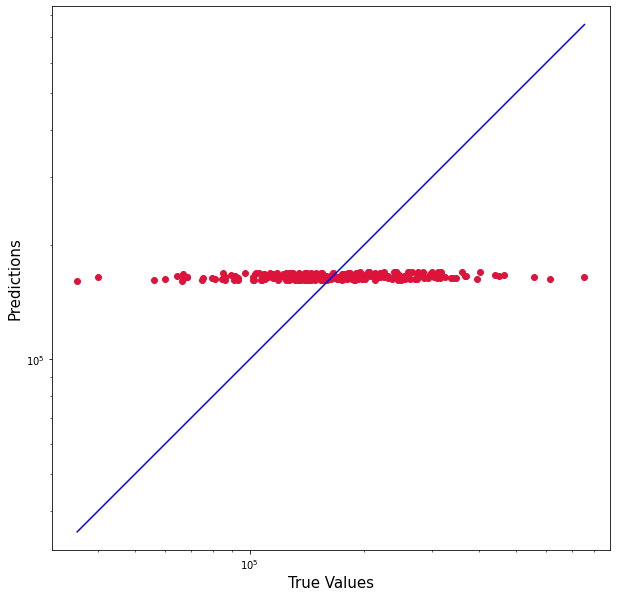

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2],'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# **Model Comparision**

We have calculated varioud metrics for performance evaluation like MAE, MSE,RMSE, R2 Score.

The less the Root Mean Squared Error (RMSE), The better the model is.

In [66]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
1,RandomForestRegressor,18587.555274,1.053381e+09,32455.825369,0.862668,31853.945121
0,LinearRegression,23293.463620,1.408746e+09,37533.260120,0.816338,36444.770291
2,SVR,59086.229092,7.787158e+09,88244.874209,-0.015232,81221.593421


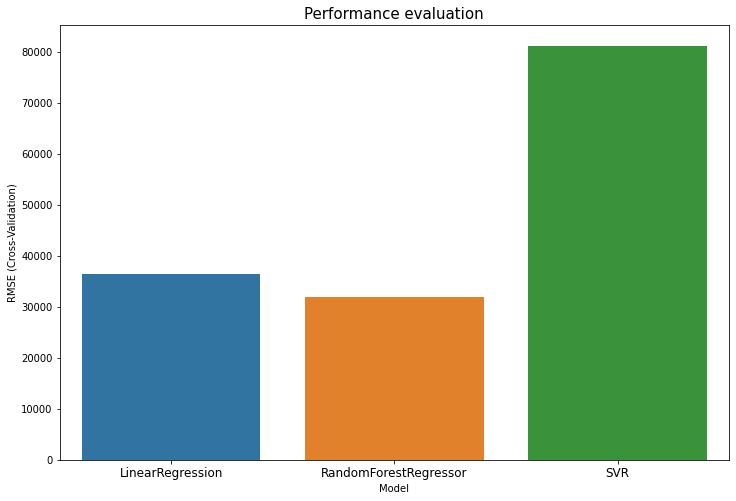

In [67]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Performance evaluation", size=15)
plt.xticks(rotation=0, size=12)
plt.show()